In [1]:
import numpy as np
import pandas as pd
storage_options = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
# GDP = pd.read_csv("StateGDP.csv")
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
codes = pd.read_csv("taxitemcodesanddescriptions.csv", header = [0], index_col = [0])
# list(GDP[["LineCode","Description"]].set_index(["LineCode", "Description"]).index.unique())

In [2]:
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_df.T# state_abbrev

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Abbr,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY


In [3]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [4]:
data_codes  = {state: f"{state}POP" for state in state_dict.values()}
state_gdp_codes = {state: f"{state}NGSP" for state in state_dict.values()}
labor_force_codes = {state: f"{state}LFN" for state in state_dict.values()}

# Select start and end dates
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fred_data = {"Population": gather_data(data_codes = data_codes, start = start, end = end, freq = "A"),
             "GDP": gather_data(data_codes = state_gdp_codes, start = start, end = end, freq = "A"),
             "Labor Force": gather_data(data_codes = labor_force_codes, start = start, end = end, freq = "A")}


In [5]:
panels = {}
for key, fred_df in fred_data.items():
    print(key)
    panels[key] = fred_df.reset_index()
    panels[key]["DATE"] = panels[key]["DATE"].astype(str).str[:4].astype(int)
    panels[key] = panels[key].melt(
        id_vars = ["DATE"], 
        var_name = "State", 
        value_name = key).set_index(["State", "DATE"]).round(2)

panels[key]


Population
GDP
Labor Force


Labor Force
State DATE             
AL    1985   1804881.33
      1986   1852269.58
      1987   1867330.08
      1988   1874511.83
      1989   1899123.92
...                 ...
WY    2020    293605.75
      2021    288769.00
      2022    292663.92
      2023    295206.42
      2024    293978.62

[2000 rows x 1 columns]

In [6]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
for name, efwdata in list(efw.items())[1:]:
        cols = list(efwdata.keys())
        col0 = cols[0]
        efwdata = efwdata.dropna(subset = cols[-1]).rename(columns = {col0:"State"})
        panel = efwdata[efwdata["State"].isin(state_names)]
        for i in range(len(years)):
                try:
                        panel = panel[["State"] + years[i:]]
                        break
                except:
                        continue
        panel["State"] = panel["State"].apply(lambda x:state_dict[x])
        panel = panel.melt(id_vars=["State"], 
                var_name="Year", 
                value_name=name).set_index(["State", "Year"]).round(2)
        panels[name] = panel.copy()
panels["EFNA"] = panels['Overall-scores(allgovs)'].rename(columns = {'Overall-scores(allgovs)':"EFNA"}).copy()
panel_keys = list(panels.keys())
for k in panel_keys:
        panels[k].rename(columns = {k: k.replace("-allg","").strip()}, inplace = True)
        if k != k.replace("-allg","").strip():
                cols0 = k.replace("-allg","").strip()
                panels["EFNA " + cols0] = panels[k].rename(columns = {cols0:"EFNA " + cols0 }).copy()
                del panels[k] 
panels.keys()

dict_keys(['Population', 'GDP', 'Labor Force', 'Overall-scores(allgovs)', 'Overall-ranks(allgovs)', 'EFNA', 'EFNA 1A', 'EFNA 1B', 'EFNA 1C', 'EFNA 1D', 'EFNA 2A', 'EFNA 2B', 'EFNA 2Bi', 'EFNA 2Bii', 'EFNA 2C', 'EFNA 2D', 'EFNA 3A', 'EFNA 3Ai', 'EFNA 3Aii', 'EFNA 3Aiii', 'EFNA 3Aiv', 'EFNA 3B', 'EFNA 3C', 'EFNA 4', 'EFNA 5', 'EFNA 6'])

In [7]:
expand_digits = {"Population": 3, "GDP": 6, "EFW":0, "Labor Force": 0, "Labor Force Participation Rate": 0}
for key in panels.keys():
    if key not in ["Population", "GDP"]:
        expand_digits[key] = 0
panel = panels["Population"].copy()
for key, df in panels.items():
    panel[key] = df[key].mul(10 ** expand_digits[key])
panel["Labor Force Participation Rate"] = panel["Labor Force"].div(panel["Population"]).mul(100)
panel["GDP Per Capita"] = panel["GDP"].div(panel["Population"])
for key in ("GDP", "Population", "GDP Per Capita"):
    panel[f"Log {key}"] = np.log(panel[key])
    panel[f"{key} % Growth"] = panel[f"Log {key}"].groupby("State").diff()
panel.loc["ND"]

,Population,GDP,Labor Force,Overall-scores(allgovs),Overall-ranks(allgovs),EFNA,EFNA 1A,EFNA 1B,EFNA 1C,EFNA 1D,...,EFNA 5,EFNA 6,Labor Force Participation Rate,GDP Per Capita,Log GDP,GDP % Growth,Log Population,Population % Growth,Log GDP Per Capita,GDP Per Capita % Growth
DATE,,,,,,,,,,,,,,,,,,,,,
1985,676980.0,NaN,329377.67,8.08,38.0,8.08,8.58,7.58,3.43,8.78,...,9.34,9.26,0.486540,NaN,NaN,NaN,13.425397,NaN,NaN,NaN
1986,669510.0,NaN,331531.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.495185,NaN,NaN,NaN,13.414301,-0.011096,NaN,NaN
1987,661140.0,NaN,330886.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.500478,NaN,NaN,NaN,13.401721,-0.012580,NaN,NaN
1988,655330.0,NaN,330709.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.504645,NaN,NaN,NaN,13.392894,-0.008827,NaN,NaN
1989,646350.0,NaN,329439.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.509692,NaN,NaN,NaN,13.379096,-0.013798,NaN,NaN
1990,637360.0,NaN,316790.50,8.16,52.0,8.16,8.57,8.29,3.38,8.08,...,9.67,9.08,0.497035,NaN,NaN,NaN,13.365090,-0.014007,NaN,NaN
1991,634200.0,NaN,316427.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.498940,NaN,NaN,NaN,13.360120,-0.004970,NaN,NaN
1992,635430.0,NaN,317226.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.499231,NaN,NaN,NaN,13.362057,0.001938,NaN,NaN
1993,637230.0,NaN,321732.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.504892,NaN,NaN,NaN,13.364886,0.002829,NaN,NaN


In [8]:
panels["Labor Force"]

Labor Force
State DATE             
AL    1985   1804881.33
      1986   1852269.58
      1987   1867330.08
      1988   1874511.83
      1989   1899123.92
...                 ...
WY    2020    293605.75
      2021    288769.00
      2022    292663.92
      2023    295206.42
      2024    293978.62

[2000 rows x 1 columns]

In [9]:
# Maybe labels from 97 keys were entered by an intern who was filling in for the usual data person who was on leave,
fix_97_keys = pd.DataFrame({'VI':"VA", "AR":"AZ", 
                            'AR    .1':"AR", "LS":"LA",
                            "GE":"GA"}, 
                           index = ["Correction"]).T
fix_97_keys

,Correction
VI,VA
AR,AZ
AR .1,AR
LS,LA
GE,GA


In [10]:
# urls = ["https://www2.census.gov/govs/statetax/" +str(i)[-2:] + "staxcd.txt" for i in range(92,122)]
tax_dfs = {}
for year in range(1992,2022):
    key = str(year)[-2:] 
    try:    
        url = "https://www2.census.gov/govs/statetax/" +key + "staxcd.txt"
        tax_dfs[year] = pd.read_csv(url, index_col = [0])
        tax_dfs[year].rename(columns = {col:col.strip().replace("-State","") for col in tax_dfs[year].columns}, inplace = True)
        tax_dfs[year].rename(columns = {name:state_df.loc[name].values[0] for name in state_names}, inplace = True)
        if key == "97":
            tax_dfs[year].rename(columns = {
                wrong_key:fix_97_keys.loc[wrong_key].values[0] for wrong_key in fix_97_keys.index}, 
                                inplace = True)
        # adjust units from 1000s to millions
        tax_dfs[year] = tax_dfs[year][state_abbrev].div(1000)
#         tax_dfs[key].rename(columns = {col:col.strip() for col in tax_dfs[key].columns}, inplace = True)
    except:
        print("failed to download " + url)
tax_dfs.keys()

failed to download https://www2.census.gov/govs/statetax/16staxcd.txt
failed to download https://www2.census.gov/govs/statetax/17staxcd.txt
failed to download https://www2.census.gov/govs/statetax/18staxcd.txt
failed to download https://www2.census.gov/govs/statetax/19staxcd.txt
failed to download https://www2.census.gov/govs/statetax/20staxcd.txt
failed to download https://www2.census.gov/govs/statetax/21staxcd.txt


dict_keys([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [11]:
code_dfs = {}
for code in codes.index:
    code_dfs[code] = {}
    for year in tax_dfs.keys():
        code_dfs[code][year] = tax_dfs[year].loc[code] 
    code_dfs[code] = pd.DataFrame(code_dfs[code])

In [12]:
code_dfs["TotalTax"] = {}
for key, df in tax_dfs.items():
    print(df.index)
    code_dfs["TotalTax"][key] = df.iloc[1:].sum()
# code_dfs["TotalTax"]

Index(['T01', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T19',
       'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T27', 'T28', 'T29', 'T40',
       'T41', 'T50', 'T51', 'T53', 'T99'],
      dtype='object')
Index(['POP', 'I99', 'T01', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15',
       'T16', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T27', 'T28',
       'T29', 'T40', 'T41', 'T50', 'T51', 'T53', 'T99'],
      dtype='object')
Index(['POP', 'I99', 'T01', 'T02', 'T04', 'T05', 'T06', 'T07', 'T09', 'T10',
       'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T19', 'T20', 'T21', 'T22',
       'T23', 'T24', 'T25', 'T27', 'T28', 'T29', 'T40', 'T41', 'T50', 'T51',
       'T53', 'T99'],
      dtype='object')
Index([  nan, 'POP', 'I99', 'T01', 'T09', 'T10', 'T11', 'T12', 'T13', 'T14',
       'T15', 'T16', 'T19', 'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T27',
       'T28', 'T29', 'T40', 'T41', 'T50', 'T51', 'T53', 'T99'],
      dtype='object', name='ITE')
Index([  nan, 'POP', 

In [13]:
tax_names = list(code_dfs.keys())
for code, df in code_dfs.items():
    code_dfs[code] = pd.DataFrame(df)
    code_dfs[code].index.name = "State"
    code_dfs[code] = code_dfs[code].reset_index().melt(id_vars=["State"], 
        var_name="Year", 
        value_name=code).set_index(["State", "Year"])
    #     panel.loc[panel.index.isin(code_dfs[code].index),code] = code_dfs[code]
# panel = panel[code].copy()
for code, df in code_dfs.items():
    panel[code] = code_dfs[code]
    
#     panel[code + "/GDP"] = panel[code].div(panel["GDP"]).mul(100)

In [14]:
panel["TotalTax/GDP"] = panel["TotalTax"].div(panel["GDP"])
panel.dropna()

Population           GDP  Labor Force  Overall-scores(allgovs)  \
State DATE                                                                   
AL    2000   4452170.0  1.205226e+11   2147173.33                     8.53   
      2001   4467630.0  1.235345e+11   2128026.25                     8.39   
      2002   4480090.0  1.283809e+11   2112621.50                     8.40   
      2003   4503490.0  1.352126e+11   2128668.17                     8.42   
      2004   4530730.0  1.483791e+11   2138306.08                     8.48   
...                ...           ...          ...                      ...   
WY    2011    567490.0  3.961510e+10    302931.92                     7.98   
      2012    576660.0  3.867930e+10    303747.92                     8.08   
      2013    582620.0  3.936560e+10    302201.08                     8.01   
      2014    583160.0  4.057390e+10    302865.08                     8.09   
      2015    586390.0  3.862480e+10    301608.08                     8.09   

            Overall-ranks(allgovs)  EFNA  EFNA 1A  EFNA 1B  EFNA 1C  EFNA 1D  \
State DATE                                                                     
AL    2000                    12.0  8.53     8.53     9.24     4.21    10.00   
      2001                    11.0  8.39     8.36     9.11     3.83     8.82   
      2002                     7.0  8.40     8.19     8.99     3.67     9.08   
      2003                     7.0  8.42     8.14     9.02     3.71     9.10   
      2004                     7.0  8.48     8.09     9.05     3.82     9.78   
...                            ...   ...      ...      ...      ...      ...   
WY    2011                    19.0  7.98     8.28     8.56     1.90     7.61   
      2012                    16.0  8.08     8.52     8.79     2.24     8.05   
      2013                    21.0  8.01     8.46     8.87     1.76     8.49   
      2014                    11.0  8.09     8.84     9.02     1.90     9.47   
      2015                    22.0  8.09     8.61     8.92     1.86     9.50   

            ...      T28    T29       T40      T41     T50     T51       T53  \
State DATE  ...                                                                
AL    2000  ...  129.486  0.058  2071.433  243.099  66.763  26.487    80.738   
      2001  ...  117.483  0.068  2437.640  201.533  47.261  29.383   118.310   
      2002  ...   98.943  0.013  2030.694  322.636  82.970  34.625    65.667   
      2003  ...   98.814  0.006  2035.538  242.411  33.549  45.839   104.386   
      2004  ...  107.177  0.007  2243.537  292.051  29.467  45.080   113.646   
...         ...      ...    ...       ...      ...     ...     ...       ...   
WY    2011  ...   22.848  0.000     0.000    0.000   0.000   0.000  1044.150   
      2012  ...   23.822  0.000     0.000    0.000   0.038   0.000   968.525   
      2013  ...   25.298  0.000     0.000    0.000   0.000   0.000   867.933   
      2014  ...   26.172  0.000     0.000    0.000   0.000   0.000   883.025   
      2015  ...   26.326  0.000     0.000    0.000   0.000   0.000   883.913   

              T99  TotalTax  TotalTax/GDP  
State DATE                                 
AL    2000  0.000  6438.438  5.342100e-08  
      2001  0.000  6747.707  5.462204e-08  
      2002  0.000  6509.765  5.070665e-08  
      2003  0.000  6416.351  4.745379e-08  
      2004  0.000  7018.242  4.729940e-08  
...           ...       ...           ...  
WY    2011  5.270  1987.353  5.016655e-08  
      2012  5.446  1987.894  5.139426e-08  
      2013  4.594  1854.155  4.710090e-08  
      2014  6.417  1963.291  4.838803e-08  
      2015  5.223  2037.754  5.275766e-08  

[800 rows x 61 columns]

In [19]:
panel.reset_index().rename(columns = {"DATE": "Year"}).to_csv("EFNAGDPTaxes.csv")

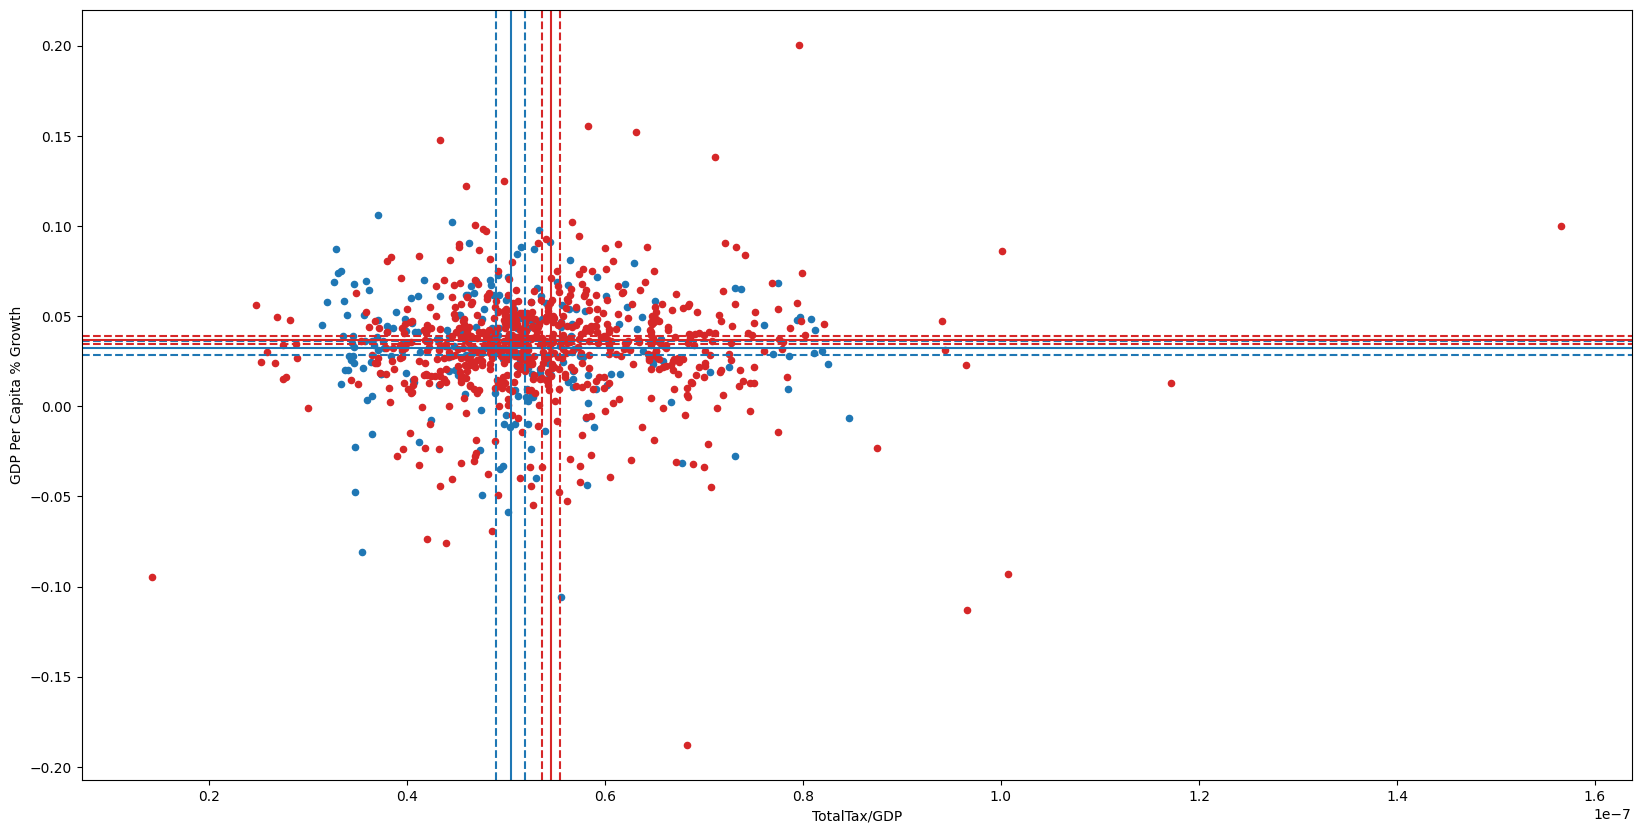

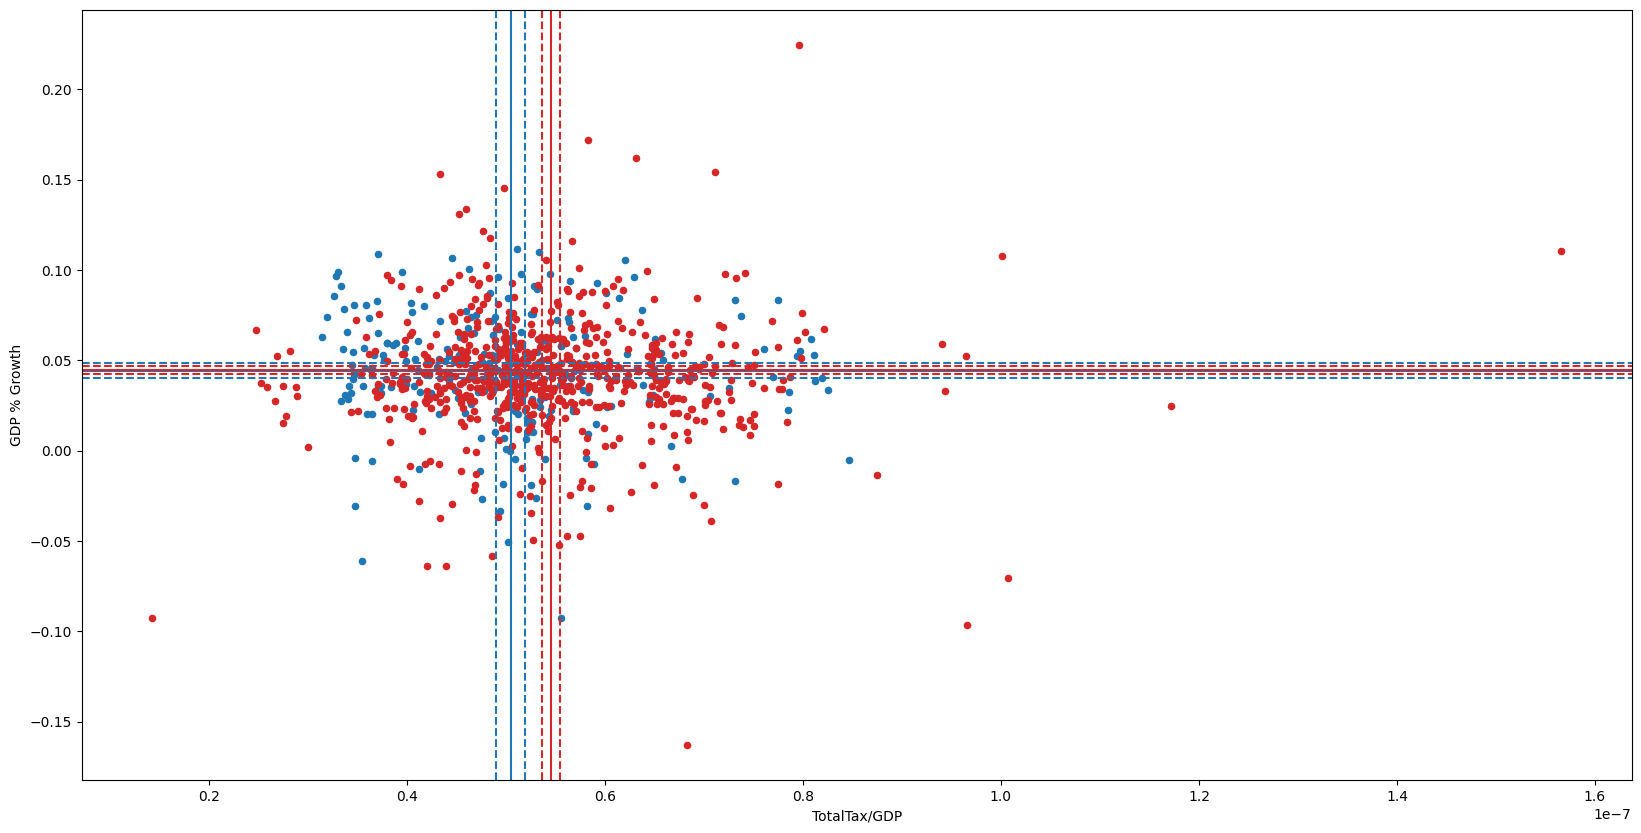

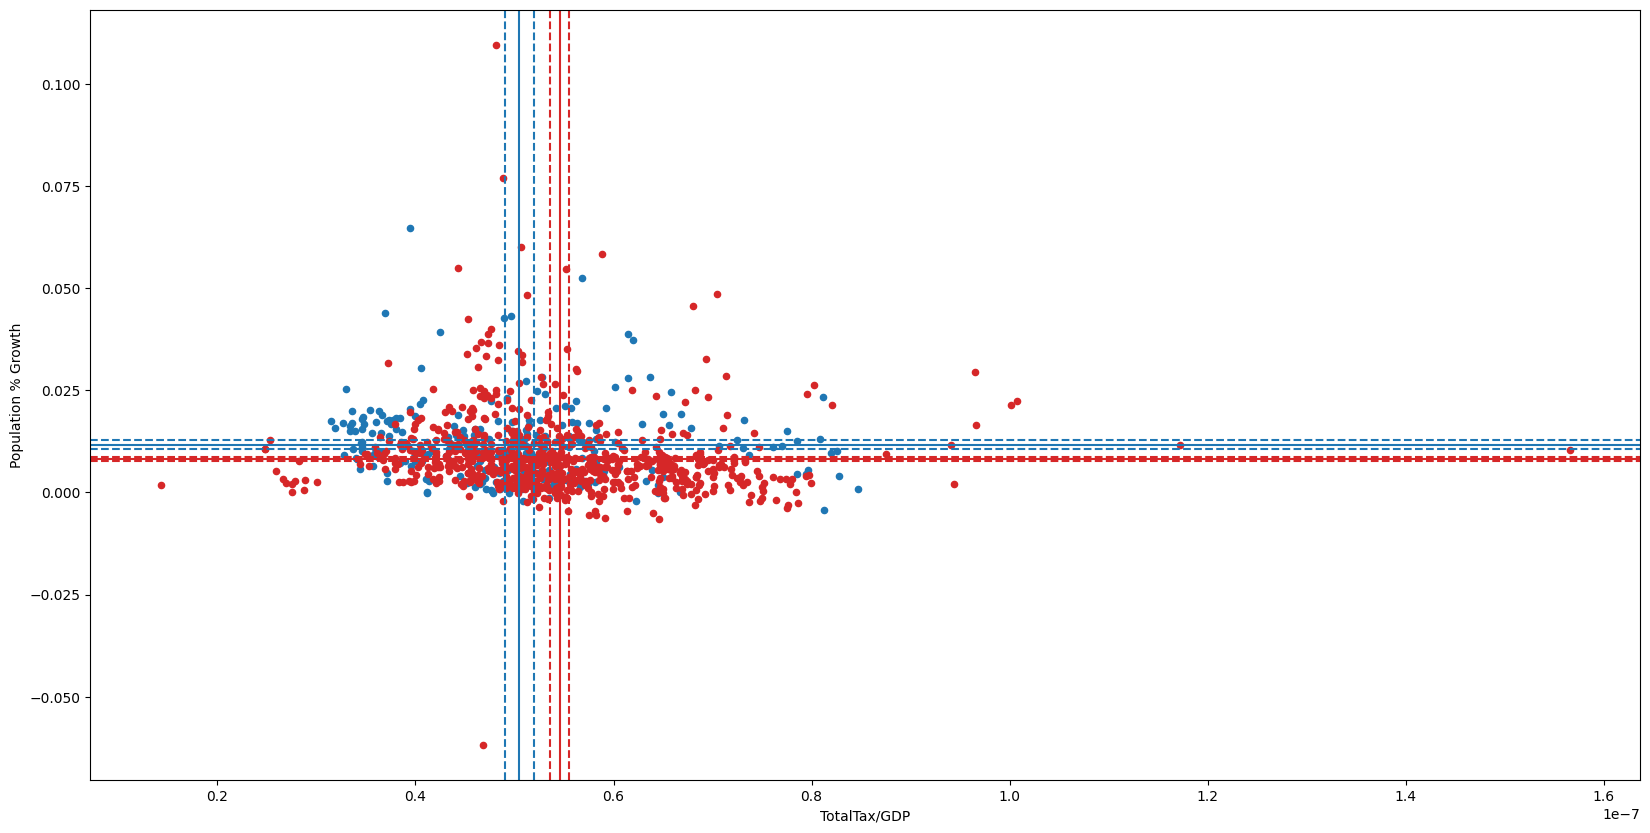

In [16]:
import matplotlib.pyplot as plt
no_prop_tax = panel[panel["T01"]==0]
prop_tax = panel[panel["T01"]!=0]

for key in ("GDP Per Capita","GDP", "Population"):
    fig, ax = plt.subplots(figsize = (20,10))
    key = key + " % Growth"
    colors = ["C0", "C3"]
    for i, df in enumerate((no_prop_tax, prop_tax)):
        color = colors[i]
        df.plot.scatter(x = "TotalTax/GDP", y = key, color = color, ax = ax)
        
        
        mean_key = df.mean()[key]
        se_key = df.sem()[key]
        mean_tax_gdp = df.mean()["TotalTax/GDP"]
        se_tax_gdp = df.sem()["TotalTax/GDP"]
        
        
        ax.axhline(mean_key, color = color)
        ax.axhline(mean_key + se_key * 2, color = color, ls = "--")
        ax.axhline(mean_key - se_key * 2, color = color, ls = "--")
        
        ax.axvline(mean_tax_gdp, color = color)
        ax.axvline(mean_tax_gdp + se_tax_gdp * 2, color = color, ls = "--")        
        ax.axvline(mean_tax_gdp - se_tax_gdp * 2, color = color, ls = "--")
        

In [17]:
pct_gdp_panel = panel.apply(lambda x: x / panel["GDP"])
pct_gdp_panel.dropna()

Population  GDP  Labor Force  Overall-scores(allgovs)  \
State DATE                                                          
AL    2000    0.000037  1.0     0.000018             7.077511e-11   
      2001    0.000036  1.0     0.000017             6.791625e-11   
      2002    0.000035  1.0     0.000016             6.543029e-11   
      2003    0.000033  1.0     0.000016             6.227230e-11   
      2004    0.000031  1.0     0.000014             5.715091e-11   
...                ...  ...          ...                      ...   
WY    2011    0.000014  1.0     0.000008             2.014383e-10   
      2012    0.000015  1.0     0.000008             2.088973e-10   
      2013    0.000015  1.0     0.000008             2.034771e-10   
      2014    0.000014  1.0     0.000007             1.993893e-10   
      2015    0.000015  1.0     0.000008             2.094509e-10   

            Overall-ranks(allgovs)          EFNA       EFNA 1A       EFNA 1B  \
State DATE                                                                     
AL    2000            9.956639e-11  7.077511e-11  7.077511e-11  7.666612e-11   
      2001            8.904395e-11  6.791625e-11  6.767340e-11  7.374458e-11   
      2002            5.452524e-11  6.543029e-11  6.379454e-11  7.002599e-11   
      2003            5.177032e-11  6.227230e-11  6.020149e-11  6.670976e-11   
      2004            4.717646e-11  5.715091e-11  5.452250e-11  6.099242e-11   
...                            ...           ...           ...           ...   
WY    2011            4.796151e-10  2.014383e-10  2.090112e-10  2.160792e-10   
      2012            4.136580e-10  2.088973e-10  2.202729e-10  2.272533e-10   
      2013            5.334607e-10  2.034771e-10  2.149084e-10  2.253236e-10   
      2014            2.711102e-10  1.993893e-10  2.178741e-10  2.223104e-10   
      2015            5.695822e-10  2.094509e-10  2.229138e-10  2.309397e-10   

                 EFNA 1C       EFNA 1D  ...           T28           T29  \
State DATE                              ...                               
AL    2000  3.493121e-11  8.297199e-11  ...  1.074371e-09  4.812375e-13   
      2001  3.100348e-11  7.139706e-11  ...  9.510137e-10  5.504535e-13   
      2002  2.858681e-11  7.072703e-11  ...  7.706988e-10  1.012612e-13   
      2003  2.743827e-11  6.730142e-11  ...  7.308047e-10  4.437456e-14   
      2004  2.574487e-11  6.591225e-11  ...  7.223187e-10  4.717646e-14   
...                  ...           ...  ...           ...           ...   
WY    2011  4.796151e-11  1.920985e-10  ...  5.767498e-10  0.000000e+00   
      2012  5.791211e-11  2.081217e-10  ...  6.158850e-10  0.000000e+00   
      2013  4.470909e-11  2.156705e-10  ...  6.426423e-10  0.000000e+00   
      2014  4.682813e-11  2.334013e-10  ...  6.450452e-10  0.000000e+00   
      2015  4.815559e-11  2.459560e-10  ...  6.815828e-10  0.000000e+00   

                     T40           T41           T50           T51  \
State DATE                                                           
AL    2000  1.718709e-08  2.017041e-09  5.539459e-10  2.197679e-10   
      2001  1.973246e-08  1.631390e-09  3.825733e-10  2.378526e-10   
      2002  1.581773e-08  2.513115e-09  6.462799e-10  2.697052e-10   
      2003  1.505435e-08  1.792814e-09  2.481204e-10  3.390143e-10   
      2004  1.512030e-08  1.968276e-09  1.985927e-10  3.038164e-10   
...                  ...           ...           ...           ...   
WY    2011  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
      2012  0.000000e+00  0.000000e+00  9.824376e-13  0.000000e+00   
      2013  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
      2014  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
      2015  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                     T53           T99      TotalTax  TotalTax/GDP  
State DATE                                                          
AL    2000  6.698993e-10  0.000000e+00  5.342100

In [18]:
# fig, ax = plt.subplots(figsize = (20,10))
# plot_df[tax_names[:-1]].plot.area(
#     legend = True, 
#     ax = ax)
